<a href="https://colab.research.google.com/github/MichaelKru92/Projekt-ML-Modelierung/blob/main/Synthea_Data_Exploration_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Benoetigte Libraries werden importiert
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys                                                                                       #os.path bietet Funktionen zur Manipulation von Pfadnamen https://docs.python.org/3/library/os.path.html
import seaborn as sns
import sqlite3


#Aktuelle Python Version wird ausgegeben----------------------------------------
print("Python Version:", sys.version)


#Pfad zum GitHub Repository und Verzeichnisnamen--------------------------------
synthea_url = "https://github.com/gaetanwabo/synthea_data.git"
synthea_dir = "synthea_data"

if not os.path.exists(synthea_dir):                                                              #Sofern der Pfad zum Verzeichnis synthea_data noch nicht existiert
    !git clone {synthea_url}                                                                     #Shell command: git kopiere das Repository synthea_url
    print(f"Repository '{synthea_url}' erfolgreich geklont.")
else:
    print(f"Verzeichnis '{synthea_dir}' existiert bereits. Kein erneutes Klonen erforderlich.")


#Inhalte des Verzeichnis inklusiver versteckter Dateien-------------------------
!ls -lah synthea_data


#Anlegen einer neuen sqlite Datenbank-------------------------------------------
db_name = "synthea_data.db"                                                                       #DB Dateiname wird vergeben
conn = sqlite3.connect(db_name)                                                                   #Verbindung zur DB Datei wird hergestellt
cur = conn.cursor()                                                                               #Ueber dise Verbindung wird auf die DB ein Cursor gesetzt


Python Version: 3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0]
Verzeichnis 'synthea_data' existiert bereits. Kein erneutes Klonen erforderlich.
total 31M
drwxr-xr-x 3 root root 4.0K Jan 25 21:40  .
drwxr-xr-x 1 root root 4.0K Jan 25 21:40  ..
-rw-r--r-- 1 root root  69K Jan 25 21:40  allergies.csv
-rw-r--r-- 1 root root 657K Jan 25 21:40  careplans.csv
-rw-r--r-- 1 root root 1.1M Jan 25 21:40  conditions.csv
-rw-r--r-- 1 root root  18K Jan 25 21:40  devices.csv
-rw-r--r-- 1 root root  16M Jan 25 21:40  encounters.csv
drwxr-xr-x 8 root root 4.0K Jan 25 21:40  .git
-rw-r--r-- 1 root root 201K Jan 25 21:40  imaging_studies.csv
-rw-r--r-- 1 root root 2.2M Jan 25 21:40  immunizations.csv
-rw-r--r-- 1 root root  11M Jan 25 21:40  medications.csv
-rw-r--r-- 1 root root  128 Jan 25 21:40  README.md
-rw-r--r-- 1 root root 118K Jan 25 21:40 'Seminar Übungen - Data Sciences.ipynb'


Index(['start', 'stop', 'patient', 'encounter', 'code', 'description'], dtype='object')
597
start            0
stop           533
patient          0
encounter        0
code             0
description      0
dtype: int64
start          object
stop           object
patient        object
encounter      object
code            int64
description    object
dtype: object


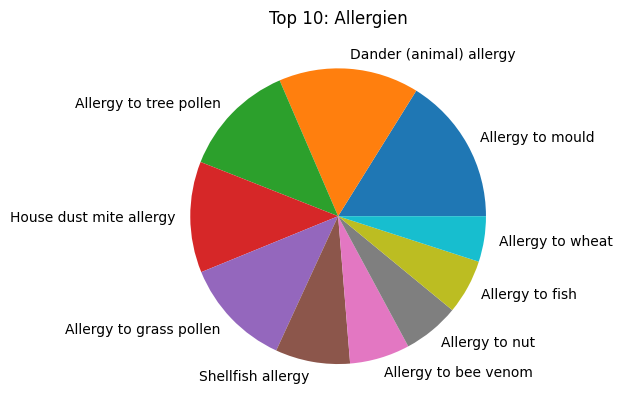

In [ ]:
#Exploration der allergies.csv Dateien als pandas DataFrame
allergies_df = pd.read_csv("https://raw.githubusercontent.com/gaetanwabo/synthea_data/refs/heads/main/allergies.csv")
allergies_df.columns = allergies_df.columns.str.lower()
print(allergies_df.columns)
print(len(allergies_df))
print(allergies_df.isnull().sum())
print(allergies_df.dtypes)
pie_allergies = allergies_df["description"].value_counts().head(10).reset_index(name="counts")
plt.pie(pie_allergies["counts"], labels = pie_allergies["description"])
plt.title("Top 10: Allergien")
plt.show()


**Ergebnisse:**

Spalten: 'start', 'stop', 'patient', 'encounter', 'code', 'description'

Zeilen:   597

NaN: stop 533

Datentypen:
start = object | stop = object | patient = object | encounter = object |
code = int64 | description = object



Index(['id', 'start', 'stop', 'patient', 'encounter', 'code', 'description',
       'reasoncode', 'reasondescription'],
      dtype='object')
3483
id                      0
start                   0
stop                 1532
patient                 0
encounter               0
code                    0
description             0
reasoncode            327
reasondescription     327
dtype: int64
id                    object
start                 object
stop                  object
patient               object
encounter             object
code                   int64
description           object
reasoncode           float64
reasondescription     object
dtype: object
0        10509002.0
1        10509002.0
2        10509002.0
3        10509002.0
4       284551006.0
           ...     
3478     70704007.0
3479    263102004.0
3480     88805009.0
3481            NaN
3482    239873007.0
Name: reasoncode, Length: 3483, dtype: float64


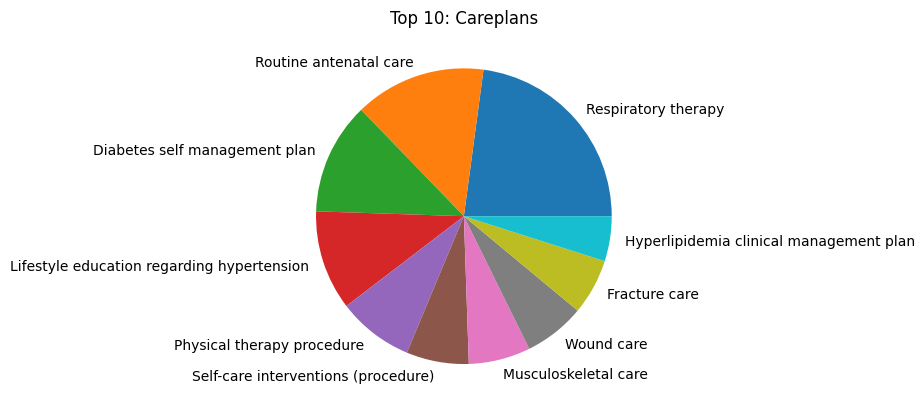

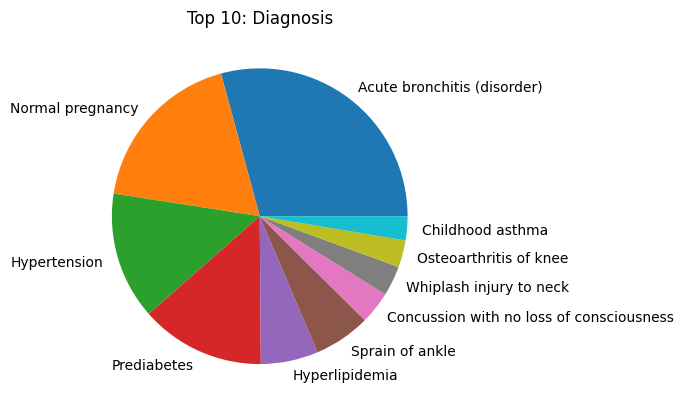

In [ ]:
#Exploration der careplans.csv Dateien als pandas DataFrame
careplans_df = pd.read_csv("https://raw.githubusercontent.com/gaetanwabo/synthea_data/refs/heads/main/careplans.csv")
careplans_df.columns = careplans_df.columns.str.lower()
print(careplans_df.columns)
print(len(careplans_df))
print(careplans_df.isnull().sum())
print(careplans_df.dtypes)
print(careplans_df["reasoncode"])
pie_careplans = careplans_df["description"].value_counts().head(10).reset_index(name="counts")
plt.pie(pie_careplans["counts"], labels = pie_careplans["description"])
plt.title("Top 10: Careplans")
plt.show()
pie_diagnosis = careplans_df["reasondescription"].value_counts().head(10).reset_index(name="counts")
plt.pie(pie_diagnosis["counts"], labels = pie_diagnosis["reasondescription"])
plt.title("Top 10: Diagnosis")
plt.show()

**Ergebnisse:**

Spalten: 'id', 'start', 'stop', 'patient', 'encounter', 'code', 'description',
       'reasoncode', 'reasondescription'

Zeilen: 3483

NaN:
stop: 1532
reasoncode: 327
reasondescription: 327

id = object |
start = object |
stop = object |
patient = object |
encounter = object |
code = int64 |
description = object |
reasoncode = float64 |
reasondescription = object

Index(['start', 'stop', 'patient', 'encounter', 'code', 'description'], dtype='object')
8376
start             0
stop           3811
patient           0
encounter         0
code              0
description       0
dtype: int64
start          object
stop           object
patient        object
encounter      object
code            int64
description    object
dtype: object
0        40055000
1       444814009
2       195662009
3        10509002
4       195662009
          ...    
8371     64859006
8372     40055000
8373    230690007
8374    444814009
8375    444814009
Name: code, Length: 8376, dtype: int64


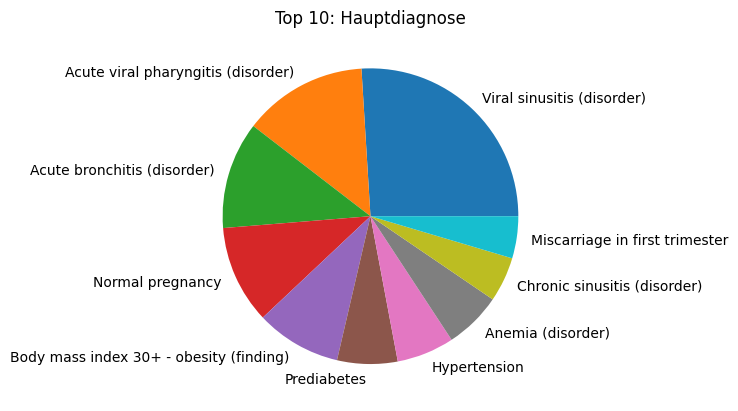

In [ ]:
#Exploration der conditions.csv Dateien als pandas DataFrame
conditions_df = pd.read_csv("https://raw.githubusercontent.com/gaetanwabo/synthea_data/refs/heads/main/conditions.csv")
conditions_df.columns = conditions_df.columns.str.lower()
print(conditions_df.columns)
print(len(conditions_df))
print(conditions_df.isnull().sum())
print(conditions_df.dtypes)
print(conditions_df["code"])
pie_conditions = conditions_df["description"].value_counts().head(10).reset_index(name="counts")
plt.pie(pie_conditions["counts"], labels = pie_conditions["description"])
plt.title("Top 10: Hauptdiagnose")
plt.show()


**Ergbenisse:**

Spalten: 'start', 'stop', 'patient', 'encounter', 'code', 'description'

Zeilen: 8376

NaN: stop = 3811

Datentypen:
start = object |
stop = object |
patient = object |
encounter = object |
code = int64 |
description = object

Index(['start', 'stop', 'patient', 'encounter', 'code', 'description', 'udi'], dtype='object')
78
start           0
stop           78
patient         0
encounter       0
code            0
description     0
udi             0
dtype: int64
start           object
stop           float64
patient         object
encounter       object
code             int64
description     object
udi             object
dtype: object
0      72506001
1      72506001
2      72506001
3     705643001
4      72506001
        ...    
73     72506001
74    706004007
75    706004007
76    705643001
77    706004007
Name: code, Length: 78, dtype: int64


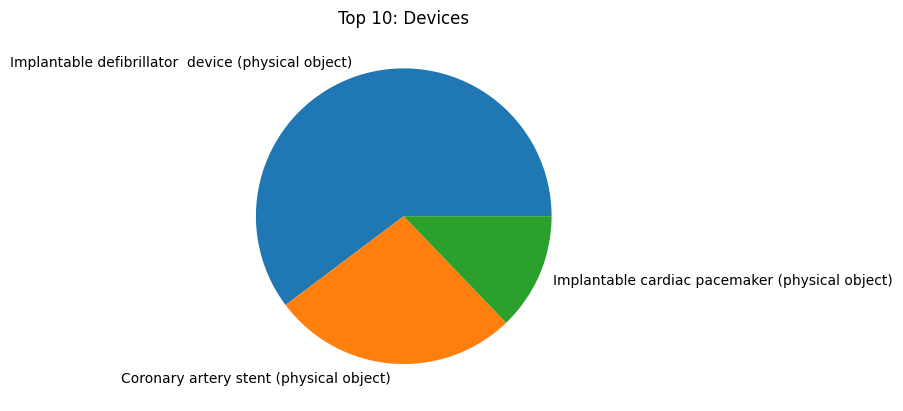

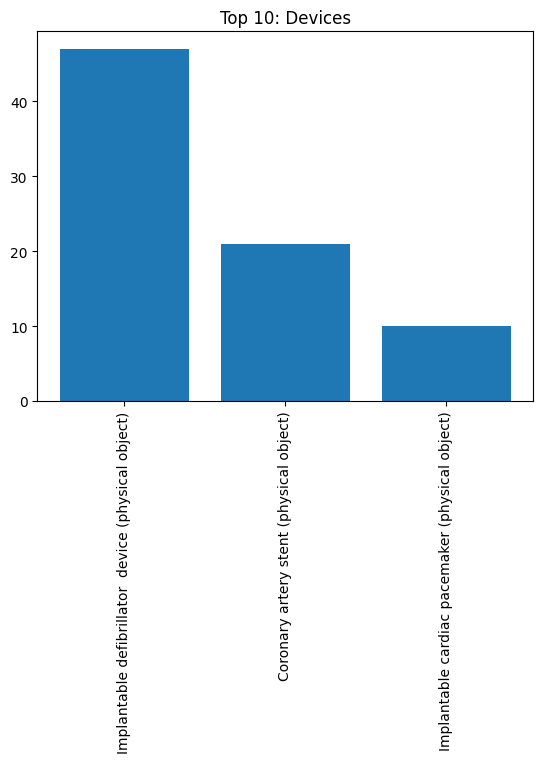

In [ ]:
#Exploration der devices.csv Dateien als pandas DataFrame
devices_df = pd.read_csv("https://raw.githubusercontent.com/gaetanwabo/synthea_data/refs/heads/main/devices.csv")
devices_df.columns = devices_df.columns.str.lower()
print(devices_df.columns)
print(len(devices_df))
print(devices_df.isnull().sum())
print(devices_df.dtypes)
print(devices_df["code"])
pie_devices = devices_df["description"].value_counts().head(10).reset_index(name="counts")
plt.pie(pie_devices["counts"], labels = pie_devices["description"])
plt.title("Top 10: Devices")
plt.show()
plt.bar(pie_devices["description"], pie_devices["counts"])
plt.title("Top 10: Devices")
plt.xticks(rotation=90)
plt.show()

Ergebnisse:
Spalten: 'start', 'stop', 'patient', 'encounter', 'code', 'description', 'udi'

Zeilen: 78

NaN: stop = 78

Datentypen:
start = object |
stop = float64 |
patient = object |
encounter = object |
code = int64 |
description = object |
udi = object |

Index(['id', 'start', 'stop', 'patient', 'organization', 'provider', 'payer',
       'encounterclass', 'code', 'description', 'base_encounter_cost',
       'total_claim_cost', 'payer_coverage', 'reasoncode',
       'reasondescription'],
      dtype='object')
53346
id                         0
start                      0
stop                       0
patient                    0
organization               0
provider                   0
payer                      0
encounterclass             0
code                       0
description                0
base_encounter_cost        0
total_claim_cost           0
payer_coverage             0
reasoncode             39569
reasondescription      39569
dtype: int64
id                      object
start                   object
stop                    object
patient                 object
organization            object
provider                object
payer                   object
encounterclass          object
code                     int64
descript

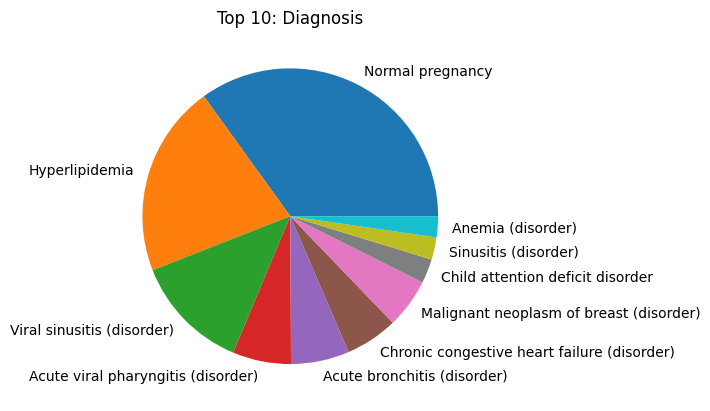

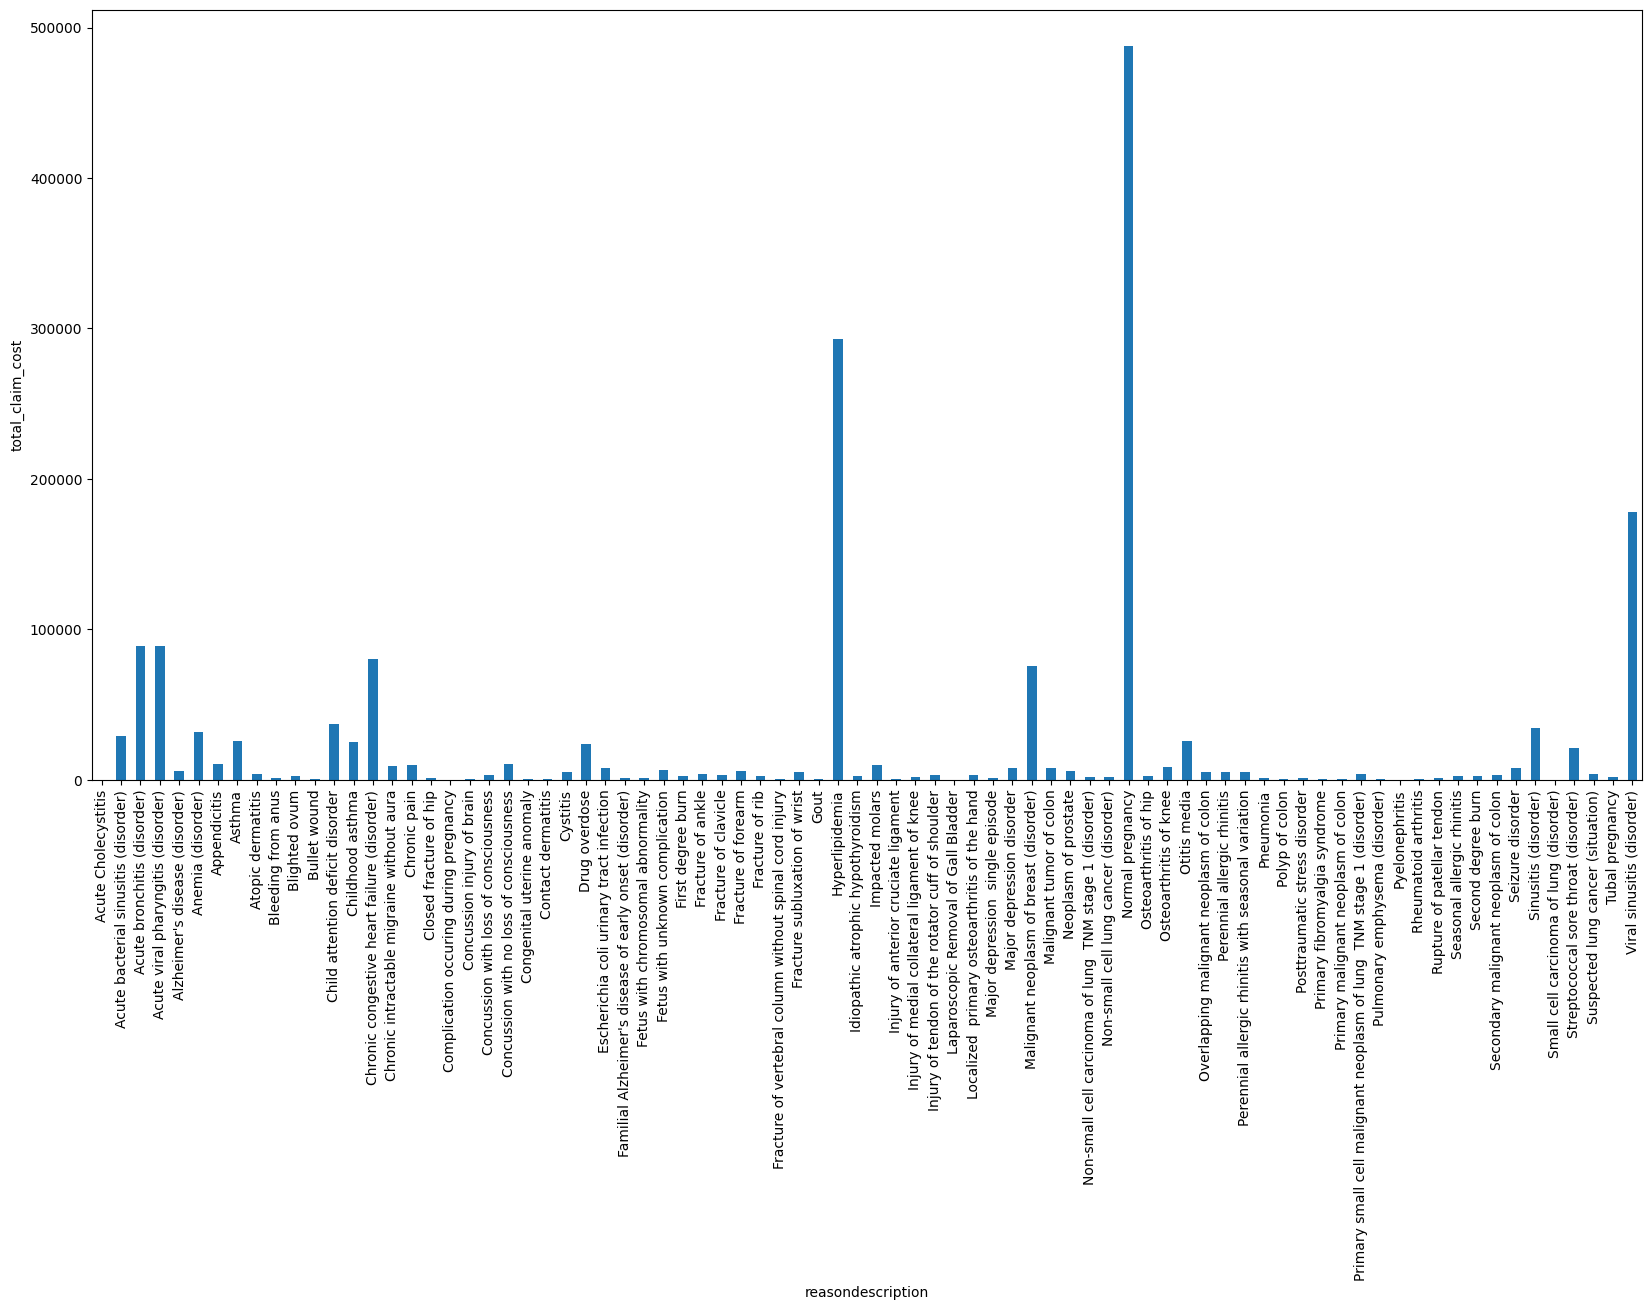

In [ ]:
#Exploration der encounters.csv Dateien als pandas DataFrame
encounters_df = pd.read_csv("https://raw.githubusercontent.com/gaetanwabo/synthea_data/refs/heads/main/encounters.csv")
encounters_df.columns = encounters_df.columns.str.lower()
print(encounters_df.columns)
print(len(encounters_df))
print(encounters_df.isnull().sum())
print(encounters_df.dtypes)
print(encounters_df["code"])
pie_encounters = encounters_df["reasondescription"].value_counts().head(10).reset_index(name="counts")
plt.pie(pie_encounters["counts"], labels = pie_encounters["reasondescription"])
plt.title("Top 10: Diagnosen")
plt.show()

encounters_df["total_claim_cost"] = encounters_df["total_claim_cost"].astype(int)
encounters_df["reasondescription"] = encounters_df["reasondescription"].astype(str)
encounters_df = encounters_df.dropna()

df_test = encounters_df.groupby("reasondescription")["total_claim_cost"].sum()
df_test.plot.bar(figsize=(20,10))
plt.ylabel("total_claim_cost")
plt.show()



Index(['id', 'date', 'patient', 'encounter', 'bodysite_code',
       'bodysite_description', 'modality_code', 'modality_description',
       'sop_code', 'sop_description'],
      dtype='object')
855
id                      0
date                    0
patient                 0
encounter               0
bodysite_code           0
bodysite_description    0
modality_code           0
modality_description    0
sop_code                0
sop_description         0
dtype: int64
id                      object
date                    object
patient                 object
encounter               object
bodysite_code            int64
bodysite_description    object
modality_code           object
modality_description    object
sop_code                object
sop_description         object
dtype: object


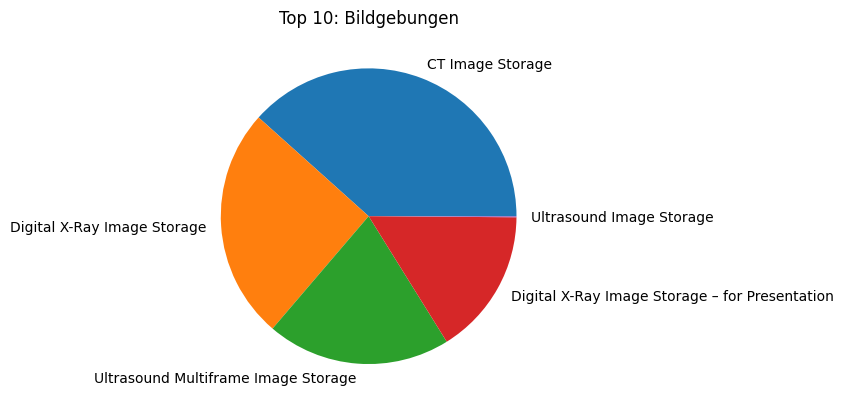

In [ ]:
#Exploration der imaging_studies.csv Dateien als pandas DataFrame
imaging_df = pd.read_csv("https://raw.githubusercontent.com/gaetanwabo/synthea_data/refs/heads/main/imaging_studies.csv")
imaging_df.columns = imaging_df.columns.str.lower()
print(imaging_df.columns)
print(len(imaging_df))
print(imaging_df.isnull().sum())
print(imaging_df.dtypes)

pie_imaging = imaging_df["sop_description"].value_counts().head(10).reset_index(name="counts")
plt.pie(pie_imaging["counts"], labels = pie_imaging["sop_description"])
plt.title("Top 10: Bildgebungen")
plt.show()


Index(['date', 'patient', 'encounter', 'code', 'description', 'base_cost'], dtype='object')
15478
date           0
patient        0
encounter      0
code           0
description    0
base_cost      0
dtype: int64
date            object
patient         object
encounter       object
code             int64
description     object
base_cost      float64
dtype: object


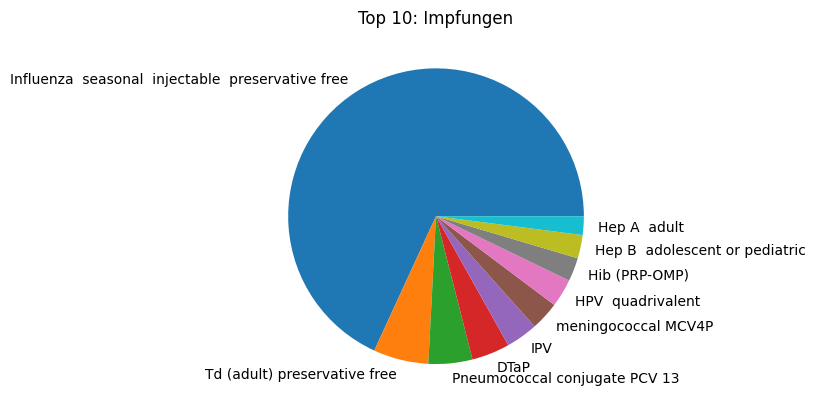

In [ ]:
#Exploration der immunizations.csv Dateien als pandas DataFrame
immunization_df = pd.read_csv("https://raw.githubusercontent.com/gaetanwabo/synthea_data/refs/heads/main/immunizations.csv")
immunization_df.columns = immunization_df.columns.str.lower()
print(immunization_df.columns)
print(len(immunization_df))
print(immunization_df.isnull().sum())
print(immunization_df.dtypes)

pie_immunization = immunization_df["description"].value_counts().head(10).reset_index(name="counts")
plt.pie(pie_immunization["counts"], labels = pie_immunization["description"])
plt.title("Top 10: Impfungen")
plt.show()

Index(['start', 'stop', 'patient', 'payer', 'encounter', 'code', 'description',
       'base_cost', 'payer_coverage', 'dispenses', 'totalcost', 'reasoncode',
       'reasondescription'],
      dtype='object')
42989
start                    0
stop                  1895
patient                  0
payer                    0
encounter                0
code                     0
description              0
base_cost                0
payer_coverage           0
dispenses                0
totalcost                0
reasoncode           11117
reasondescription    11117
dtype: int64
start                 object
stop                  object
patient               object
payer                 object
encounter             object
code                   int64
description           object
base_cost            float64
payer_coverage       float64
dispenses              int64
totalcost            float64
reasoncode           float64
reasondescription     object
dtype: object


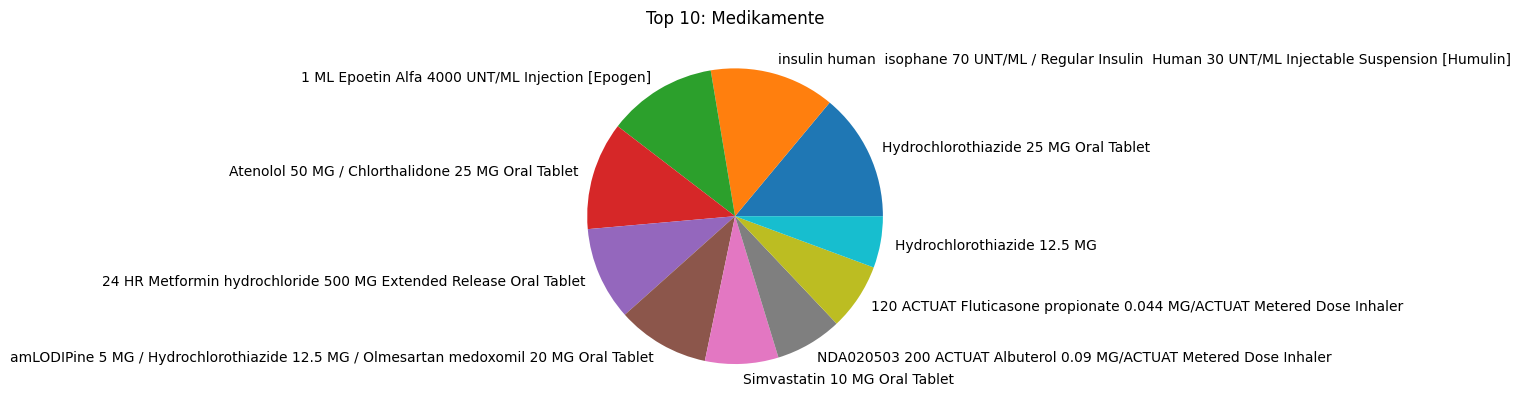

In [ ]:
#Exploration der medications.csv Dateien als pandas DataFrame
medications_df = pd.read_csv("https://raw.githubusercontent.com/gaetanwabo/synthea_data/refs/heads/main/medications.csv")
medications_df.columns = medications_df.columns.str.lower()
print(medications_df.columns)
print(len(medications_df))
print(medications_df.isnull().sum())
print(medications_df.dtypes)

pie_medications = medications_df["description"].value_counts().head(10).reset_index(name="counts")
plt.pie(pie_medications["counts"], labels = pie_medications["description"])
plt.title("Top 10: Medikamente")
plt.show()